# loader

In [1]:
from loader.load_data import load_fashionmnist, load_pneumoniamnist, load_chestmnist
train, test, classnames = load_fashionmnist()
# train, test, classnames = load_pneumoniamnist()
# train, test, classnames = load_chestmnist()

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


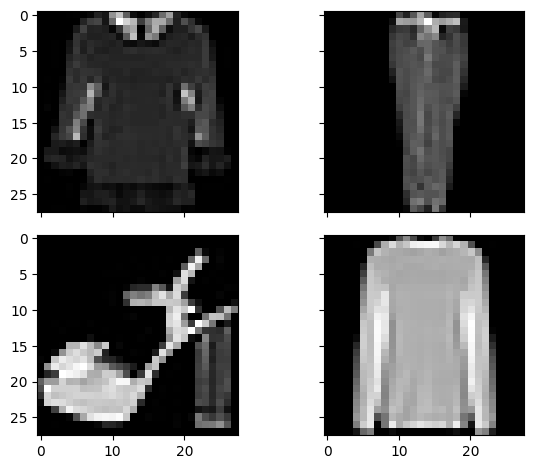

In [2]:
from _utils.load_utils import display_from_batch
print(classnames)
sample_batch = next(iter(train))
display_from_batch(sample_batch, 2, 2, classnames)

# model

In [3]:
from model.load_model import MyCNN
model = MyCNN(28, 28, 10)
numel_list = [p.numel() for p in model.parameters()]
# sum(numel_list), numel_list
print('MyCNN: ', sum(numel_list), numel_list)
from torchinfo import summary
summary(model, input_size=(1,1,28,28), device='cpu') 

MyCNN:  123222 [400, 16, 12800, 32, 51200, 64, 57600, 100, 1000, 10]


Layer (type:depth-idx)                   Output Shape              Param #
MyCNN                                    [1, 10]                   --
├─Conv2d: 1-1                            [1, 16, 24, 24]           416
├─ReLU: 1-2                              [1, 16, 24, 24]           --
├─Conv2d: 1-3                            [1, 32, 20, 20]           12,832
├─ReLU: 1-4                              [1, 32, 20, 20]           --
├─MaxPool2d: 1-5                         [1, 32, 10, 10]           --
├─Conv2d: 1-6                            [1, 64, 6, 6]             51,264
├─ReLU: 1-7                              [1, 64, 6, 6]             --
├─MaxPool2d: 1-8                         [1, 64, 3, 3]             --
├─Linear: 1-9                            [1, 100]                  57,700
├─ReLU: 1-10                             [1, 100]                  --
├─Linear: 1-11                           [1, 10]                   1,010
Total params: 123,222
Trainable params: 123,222
Non-trainable params:

# runner

In [4]:
import datetime
current_time = datetime.datetime.today() # 2021-08-15 20:58:43.302125
current_time = current_time.strftime('%Y%m%d%H%M%S') # 20210815205827

In [5]:
import torch
from torch import nn, optim
from runner.run_multiclass_loop import mlc_training_loop
from runner.run_multilabel_loop import mll_training_loop
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MyCNN(28, 28, 10).to(device)
loss_fn = nn.CrossEntropyLoss()
# loss_fn = nn.MultiLabelSoftMarginLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)
mlc_training_loop(
    n_epochs=10,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train,
    test_loader=test,
    device=device
)

100%|█████████████████████████████████████████| 234/234 [00:07<00:00, 29.44it/s]


0 2.2987857325394265 0.14646768162393162 0.31630608439445496


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.61it/s]


1 1.6825379864852317 0.4517227564102564 0.6343148946762085


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.76it/s]


2 0.9162692893216539 0.6568342681623932 0.6843950152397156


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.82it/s]


3 0.777392479994778 0.7057458600427351 0.6904046535491943


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.68it/s]


4 0.7138118843663915 0.732154780982906 0.720552921295166


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.81it/s]


5 0.6811475418667936 0.7447248931623932 0.7407852411270142


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.81it/s]


6 0.6538534699079817 0.7562433226495726 0.7601162195205688


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 41.02it/s]


7 0.6309784905337469 0.764206063034188 0.76171875


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.71it/s]


8 0.6119029804616527 0.7728866185897436 0.7604166865348816


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 41.00it/s]


9 0.5936987346334007 0.7802317040598291 0.7657251954078674
-----------training finished-----------
train_losses:  [2.2987857325394265, 1.6825379864852317, 0.9162692893216539, 0.777392479994778, 0.7138118843663915, 0.6811475418667936, 0.6538534699079817, 0.6309784905337469, 0.6119029804616527, 0.5936987346334007]
train_acc:  [0.14646768162393162, 0.4517227564102564, 0.6568342681623932, 0.7057458600427351, 0.732154780982906, 0.7447248931623932, 0.7562433226495726, 0.764206063034188, 0.7728866185897436, 0.7802317040598291]
val_acc:  [0.31630608439445496, 0.6343148946762085, 0.6843950152397156, 0.6904046535491943, 0.720552921295166, 0.7407852411270142, 0.7601162195205688, 0.76171875, 0.7604166865348816, 0.7657251954078674]


In [6]:
import collections
import tqdm
all_acc_dict = collections.OrderedDict()

# VGGnet

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
torch.Size([4, 1, 224, 224])


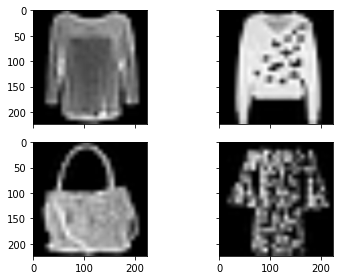

In [27]:
from loader.load_data import load_fashionmnist, load_pneumoniamnist, load_chestmnist
from torchvision import transforms
trformers=transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor()
])
train, test, classnames = load_fashionmnist(batch_size=4, trformers=trformers)
# train, test, classnames = load_pneumoniamnist()
# train, test, classnames = load_chestmnist()

from _utils.load_utils import display_from_batch
print(classnames)
sample_batch = next(iter(train))
print(sample_batch[0].shape)
display_from_batch(sample_batch, 2, 2, classnames)

In [28]:
from model.load_model import VGG
cfgs = { "A": [64, "M", 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
         "B": [64, 64, "M", 128, 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
         "D": [64, 64, "M", 128, 128, "M", 256, 256, 256, "M", 512, 512, 512, "M", 512, 512, 512, "M"],
         "E": [64, 64, "M", 128, 128, "M", 256, 256, 256, 256, "M", 512, 512, 512, 512, "M", 512, 512, 512, 512, "M"] }
model = VGG(cfgs["E"], batch_norm=False, num_classes=10)

In [29]:
numel_list = [p.numel() for p in model.parameters()]
# sum(numel_list), numel_list
print('VGG: ', sum(numel_list), numel_list)
from torchinfo import summary
summary(model, input_size=(2,1,224,224), device='cpu') 

VGG:  139610058 [576, 64, 36864, 64, 73728, 128, 147456, 128, 294912, 256, 589824, 256, 589824, 256, 589824, 256, 1179648, 512, 2359296, 512, 2359296, 512, 2359296, 512, 2359296, 512, 2359296, 512, 2359296, 512, 2359296, 512, 102760448, 4096, 16777216, 4096, 40960, 10]


Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      --                        --
├─Sequential: 1-1                        [2, 512, 7, 7]            --
│    └─Conv2d: 2-1                       [2, 64, 224, 224]         640
│    └─ReLU: 2-2                         [2, 64, 224, 224]         --
│    └─Conv2d: 2-3                       [2, 64, 224, 224]         36,928
│    └─ReLU: 2-4                         [2, 64, 224, 224]         --
│    └─MaxPool2d: 2-5                    [2, 64, 112, 112]         --
│    └─Conv2d: 2-6                       [2, 128, 112, 112]        73,856
│    └─ReLU: 2-7                         [2, 128, 112, 112]        --
│    └─Conv2d: 2-8                       [2, 128, 112, 112]        147,584
│    └─ReLU: 2-9                         [2, 128, 112, 112]        --
│    └─MaxPool2d: 2-10                   [2, 128, 56, 56]          --
│    └─Conv2d: 2-11                      [2, 256, 56, 56]          295,

In [30]:
import torch
x = torch.randn(2,1,224,224)
print(model(x).shape)

torch.Size([2, 10])


In [ ]:
import torch
from torch import nn, optim
from runner.run_multiclass_loop import mlc_training_loop
from runner.run_multilabel_loop import mll_training_loop
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
loss_fn = nn.CrossEntropyLoss()
# loss_fn = nn.MultiLabelSoftMarginLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)
mlc_training_loop(
    n_epochs=10,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train,
    test_loader=test,
    device=device
)

 33%|███▎      | 4956/15000 [03:17<06:31, 25.67it/s]

In [24]:
import torch
from torch import nn, optim
from runner.run_multiclass_loop import mlc_training_loop
from runner.run_multilabel_loop import mll_training_loop
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [25]:
torch.cuda.is_available()

True